<a href="https://colab.research.google.com/github/ki-ki13/Rakamin_VIX/blob/main/Tugas_Akhir_Home_Credit_Rakamin_Internship.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2>Define Problem</h2>

Dalam pemberian layanan terhadap customer home credit, perlu adanya analisis mengenai skor kredit melalui prediksi skor kredit. Hasil dari analisis skor kredit digunakan untuk memastikan bahwa pelanggan yang mempunyai potensi melakukan penulanasan tidak ditolak saat mengajukan kredit. Analisa skor kredit secara manual akan membutuhkan waktu yang lama dan tenaga yang besar apalagi jika data yang masuk cukup banyak. Maka dari itu, dibutuhkan solusi agar pemberian skor kredit lebih efisien. Solusi untuk mengatasi hal tersebut, prediksi skor kredit dapat diselesaikan menggunakan machine learning.

Pada kasus ini akan dilakukan 
* Analisa mengenai pelanggan yang bisa melakukan pelunasan dan yang tidak. Analisa meliputi jumlah pelanggan yang melakukan pelunansan atau tidak, faktor yang mempengaruhi dalam melakukan pelunasan, dan solusi bagaimana sebaiknya home credit memberikan pinjaman kepada pelanggan berdasarkan visualisasi data.

* Pembuatan model prediktif berupa klasifikasi sehingga home credit dapat memprediksi skor kredit customer. Algoritma yang digunakan adalah algoritma yang termasuk dalam supervised learning dimana terdapat label pada data training. Skor kredit terdiri atas 1 dan 0. Skor kredit 1 menunjukkan bahwa customer memiliki kesulitan dalam pelunasan. Sedangkat 0 menunjukkan bahwa customer tidak memililki kesulitan dalam pelunasan.

<h2>Dataset</h2>

Data terdiri dari 7 tabel dimana data utama berada pada tabel application_{train|test}. 

* **Tabel application_{train|test}** berisi tentang pinjaman saat waktu pengajuan
* **Tabel previous_application** berisi tentang informasi peminjaman sebelumnya
* **Tabel POS_CASH_balance** berisi tentang informasi saldo bulanan pinjaman sebelumnya 
* **Tabel instalments_payments** berisi tentang transaksi berkaitan dengan peminjaman sebelumnya 
* **Tabel credit_card_balance** berisi tentang informasi saldo bulanan kartu kredit pada peminjaman sebelumnya
* **Tabel bureau** berisi tentang data peminjaman dari institusi lain
* **Tabel bureau_balance** berisi tentang saldo bulanan pada kredit sebelumnya di institusi lain 

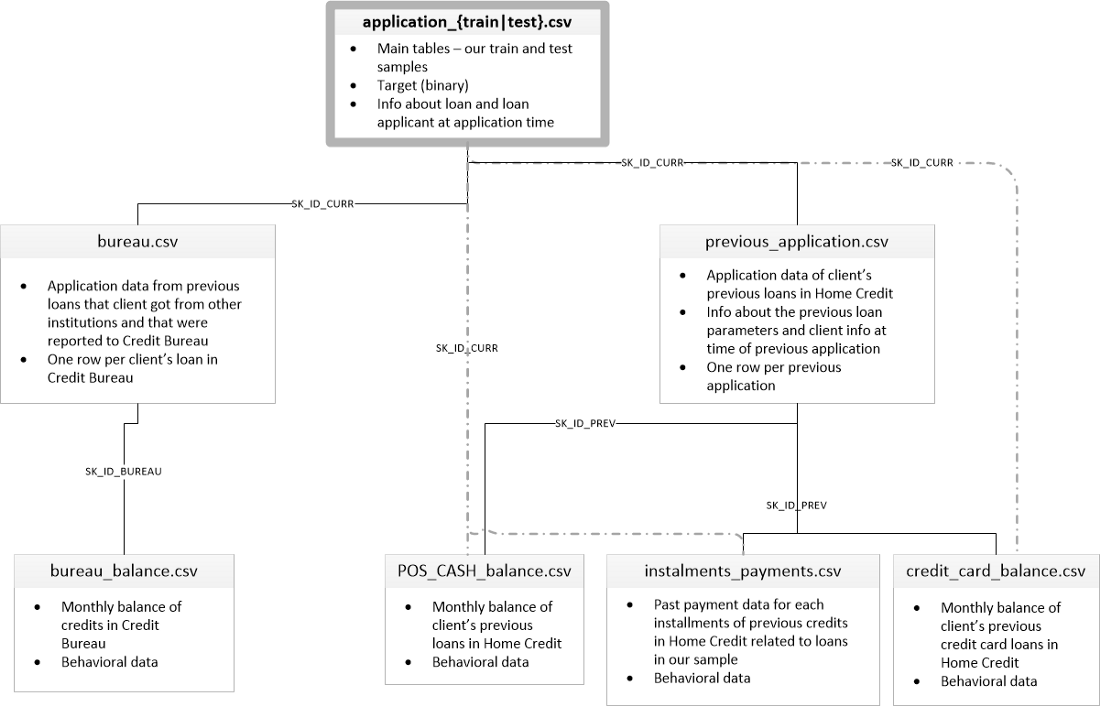

# <h2>Exploratory Data Analysis (EDA)</h2>

### Ambil data

In [2]:
# numpy dan pandas untuk manipulasi data
import pandas as pd
import numpy as np

#matplotlib dan seaborn untuk membuat grafik 
import matplotlib.pyplot as plt
import seaborn as sns

# LabelEncoder untuk mengubah categorical values menjadi numeric
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

In [ ]:


# Refer :- https://www.kaggle.com/rinnqd/reduce-memory-usage

def reduce_memory_usage(df):
  
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [4]:
app_train = pd.read_csv('/content/drive/MyDrive/VIX Rakamin/Home Credit/Tugas Akhir/application_train.csv')
print('ukuran data', app_train.shape)
app_train.head()

ukuran data (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
app_test = pd.read_csv('/content/drive/MyDrive/VIX Rakamin/Home Credit/Tugas Akhir/application_test.csv')
print('ukuran data', app_test.shape)
app_test.head()

ukuran data (48744, 121)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


Pada tabel application train terdapat 397511 baris dan 122 kolom. Pada deretan kolom tersebut terdapat kolom *TARGET* yang mana merupakan kolom yang akan diprediksi. Sedangkan application test mempunyai 48744 baris dan 121 kolom tanpa kolom *TARGET*.

### Deskripsi Dataset

In [ ]:
app_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


Dari 122 features terdiri dari nilai numeric (float dan int) dan nilai categorical (object). Kolom dengan nilai categorical perlu dilakukan encoding agar berubah menjadi nilai numeric. 

In [ ]:
kolom = pd.DataFrame(app_train.select_dtypes('object').apply(pd.Series.nunique, axis = 0))
kolom

,0
NAME_CONTRACT_TYPE,2
CODE_GENDER,3
FLAG_OWN_CAR,2
FLAG_OWN_REALTY,2
NAME_TYPE_SUITE,7
NAME_INCOME_TYPE,8
NAME_EDUCATION_TYPE,5
NAME_FAMILY_STATUS,6
NAME_HOUSING_TYPE,6
OCCUPATION_TYPE,18


Features diatas perlu dilakukan encoding. Terdapat dua jenis encoding yaitu, label encoding dan one-hot encoding. Pada kasus ini, encoding yang akan digunakan adalah one-hot encoding.

### Cek Missing Values

In [ ]:
mis_val = app_train.isnull().sum()
mis_val_percent = (app_train.isnull().sum()/len(app_train))*100
mis_val_table = pd.concat([mis_val,mis_val_percent], axis=1)
mis_val_table = mis_val_table.rename(columns={
    0 : 'Missing Values',
    1 : 'Presentase Missing Values'})
mis_val_table = mis_val_table[mis_val_table.iloc[:,1] != 0].sort_values('Presentase Missing Values', ascending=False).round(1)
print('Kolom dengan missing values = ', str(mis_val_table.shape[0]), ' kolom')
mis_val_table

Kolom dengan missing values =  67  kolom


,Missing Values,Presentase Missing Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4


Berdasarkan tabel diatas missing values pada dataset cukup banyak. Terdapat 67 kolom dari 122 kolom yang memiliki missing values dan missing values tertinggi ada pada *COMMONAREA_MEDI* dengan presentase missing values 69.9%. Missing values ini bisa diatasi dengan diimpute, diisi dengan mean atau median.

#### Distribusi Data pada Target

In [ ]:
app_train['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

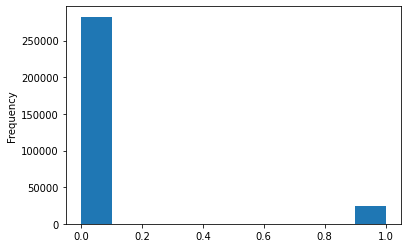

In [ ]:
app_train['TARGET'].astype(int).plot.hist()

Grafik distribusi data pada target dapat menunjukkan apakah dataset imbalanced atau balanced. Dari grafik diatas dapat disimpulkan bahwa dataset imbalanced dimana data didominasi dengan kelas 0. Customer dengan kemampuan melakukan pelunasan jumlahnya lebih banyak daripada customer dengan kesulitan melakukan pembayaran.

#### Helper 

In [ ]:
#Untuk membuat stack plot
def stack_plot(data, xtick, col2='TARGET', col3='total'):
    ind = np.arange(data.shape[0])
    
    # if len(data[xtick].unique())<5:
    #     plt.figure(figsize=(5,5))
    # elif len(data[xtick].unique())>5 & len(data[xtick].unique())<10:
    #     plt.figure(figsize=(7,7))
    # else:
    #     plt.figure(figsize=(15,15))
    p1 = plt.bar(ind, data[col3].values, width = 0.3)
    p2 = plt.bar(ind+0.3, data[col2].values, width = 0.3)

    plt.ylabel('Loans')
    plt.title('Number of loans aproved vs rejected')
    plt.xticks(ticks=ind,rotation=90,labels= list(data[xtick].values))
    plt.legend((p1[0], p2[0]), ('capable', 'not capable'))
    plt.show()

In [ ]:
def univariate_barplots(data, col1, col2='TARGET', top=False):
    # Count number of zeros in dataframe python: https://stackoverflow.com/a/51540521/4084039
    temp = pd.DataFrame(app_train.groupby(col1)[col2].agg(lambda x: x.eq(1).sum())).reset_index()

    # Pandas dataframe grouby count: https://stackoverflow.com/a/19385591/4084039
    temp['target_0'] = app_train.groupby(col1)[col2].agg(lambda x: x.eq(0).sum()).values
    temp['total'] = pd.DataFrame(app_train.groupby(col1)[col2].agg(total='count')).reset_index()['total']
    # temp['Avg'] = pd.DataFrame(app_train.groupby(col1)[col2].agg(Avg='mean')).reset_index()['Avg']
    temp['presentase_defaulter_total'] = (temp['TARGET']/temp['total'])*100
    
    temp.sort_values(by=['total'],inplace=True, ascending=False)
    
    if top:
        temp = temp[0:top]
    
    stack_plot(temp, xtick=col1, col2='TARGET', col3='target_0')
    # print(temp.head(5))
    # print("="*50)
    # print(temp.tail(5))
    return temp

In [ ]:
#Refer :- https://www.kaggle.com/jsaguiar/lightgbm-7th-place-solution
#one hot encode the categorical data

def one_hot_encode(df):
    original_columns = list(df.columns)
    categories = [cat for cat in df.columns if df[cat].dtype == 'object']
    df = pd.get_dummies(df, columns= categories, dummy_na= True) #one_hot_encode the categorical features
    categorical_columns = [cat for cat in df.columns if cat not in original_columns]
    return df, categorical_columns

#### Analisis Univariate Kolom Name_Contract_Type

In [ ]:
app_train['NAME_CONTRACT_TYPE'].value_counts()

Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64

In [ ]:
temp = pd.DataFrame(app_train.groupby('NAME_CONTRACT_TYPE')['TARGET'].agg(lambda x: x.eq(1).sum())).reset_index()
temp['TARGET_0'] = app_train.groupby('NAME_CONTRACT_TYPE')['TARGET'].agg(lambda x: x.eq(0).sum()).values
temp

,NAME_CONTRACT_TYPE,TARGET,TARGET_0
0,Cash loans,23221,255011
1,Revolving loans,1604,27675


In [ ]:
tempe = app_train.groupby('NAME_CONTRACT_TYPE')['TARGET'].agg(lambda x: x.eq(0).sum()).values
tempe

array([255011,  27675])

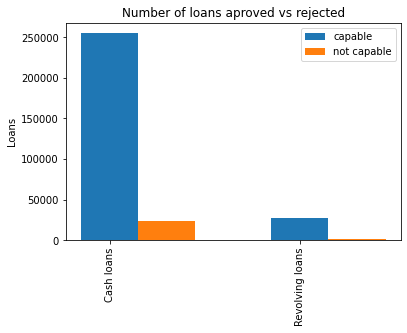

,NAME_CONTRACT_TYPE,TARGET,target_0,total,presentase_defaulter_total
0,Cash loans,23221,255011,278232,8.345913
1,Revolving loans,1604,27675,29279,5.478329


In [ ]:
univariate_barplots(app_train, 'NAME_CONTRACT_TYPE', 'TARGET', False)

Cash loans atau jenis peminjaman berupa uang lebih banyak dipilih oleh customer dibandingkan dengan revolving loans atau pinjaman bergulir seperti kartu kredit. Sebanyak 90% berupa cash loans dan 9.5% berupa revolving loans. 

#### Analisis Univariate Kolom Code_Gender

In [ ]:
app_train['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

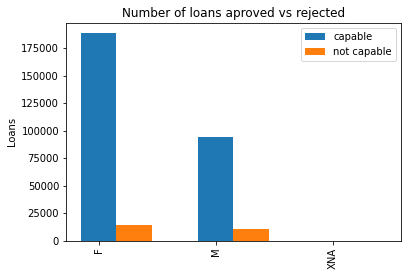

,CODE_GENDER,TARGET,target_0,total,presentase_defaulter_total
0,F,14170,188278,202448,6.999328
1,M,10655,94404,105059,10.141920
2,XNA,0,4,4,0.000000


In [ ]:
univariate_barplots(app_train, 'CODE_GENDER', 'TARGET', False)

Berdasarkan grafik diatas, jumlah customer perempuan lebih banyak dibanding customer laki-laki. Terdapat 3 jenis gender, F untuk perempuan, M untuk laki-laki, XNA tidak terdefinisi. Jumlah XNA hanyalah 4 sehingga nantinya akan diganti. Customer perempuan cenderung lebih bisa melunasi peminjaman dibanding laki-laki. Rasio antara kelas 0 (kesulitan melakukan pelunasan) dengan total data pada customer perempuan adalah 7%. Sedangkan customer laki-laki 10%.    

#### Analisis Univariate Kolom Education_Type

In [ ]:
app_train['NAME_EDUCATION_TYPE'].value_counts()

Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: NAME_EDUCATION_TYPE, dtype: int64

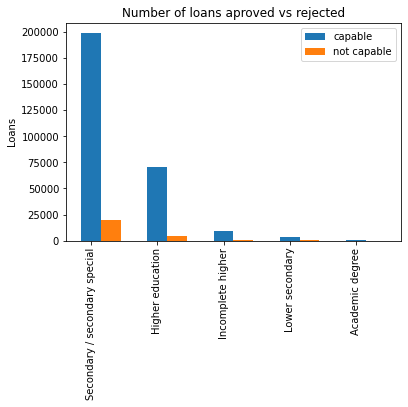

,NAME_EDUCATION_TYPE,TARGET,target_0,total,presentase_defaulter_total
4,Secondary / secondary special,19524,198867,218391,8.939929
1,Higher education,4009,70854,74863,5.355115
2,Incomplete higher,872,9405,10277,8.484966
3,Lower secondary,417,3399,3816,10.927673
0,Academic degree,3,161,164,1.829268


In [ ]:
univariate_barplots(app_train, 'NAME_EDUCATION_TYPE', 'TARGET', False)

Sebagian besar customer memiliki jenjang pendidikan secondary/secondary special. Perbandingan antara customer yang kemampuan melakukan pelunasan dengan yang tidak bisa pada setiap jenjang pendidikan hampir sama yaitu dengan porsi jumlah pelanggan mampu melakukan pelunasan lebih banyak daripada yang tidak bisa. 

#### Analisis Univariate Kolom NAME_FAMILY_STATUS

In [ ]:
app_train['NAME_FAMILY_STATUS'].value_counts()

Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: NAME_FAMILY_STATUS, dtype: int64

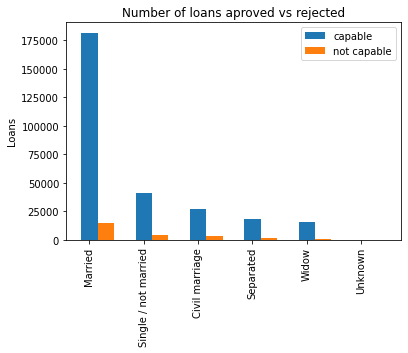

,NAME_FAMILY_STATUS,TARGET,target_0,total,presentase_defaulter_total
1,Married,14850,181582,196432,7.559868
3,Single / not married,4457,40987,45444,9.807675
0,Civil marriage,2961,26814,29775,9.944584
2,Separated,1620,18150,19770,8.194234
5,Widow,937,15151,16088,5.824217
4,Unknown,0,2,2,0.000000


In [ ]:
univariate_barplots(app_train, 'NAME_FAMILY_STATUS', 'TARGET', False)

In [ ]:
196432/len(app_train['TARGET'])

0.6387804013514964

Mayoritas customer sudah menikah, sebanyak 64% dari seluruh customer. Pada customer dengan status single, presentase skor kredit bernilai 1 atau kesulitan melakukan pelunasan adalah paling tinggi.

#### Analisis Univariate Kolom CNT_CHILDREN

In [ ]:
app_train['CNT_CHILDREN'].value_counts()

0     215371
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
14         3
8          2
9          2
12         2
10         2
19         2
11         1
Name: CNT_CHILDREN, dtype: int64

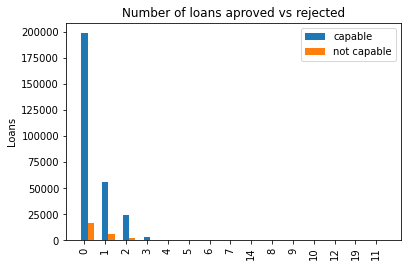

,CNT_CHILDREN,TARGET,target_0,total,presentase_defaulter_total
0,0,16609,198762,215371,7.711809
1,1,5454,55665,61119,8.923575
2,2,2333,24416,26749,8.721821
3,3,358,3359,3717,9.631423
4,4,55,374,429,12.820513
5,5,7,77,84,8.333333
6,6,6,15,21,28.571429
7,7,0,7,7,0.000000
13,14,0,3,3,0.000000
8,8,0,2,2,0.000000


In [ ]:
children = univariate_barplots(app_train, 'CNT_CHILDREN', 'TARGET', False)
children

In [ ]:
children[children['CNT_CHILDREN'] >= 4]

,CNT_CHILDREN,TARGET,target_0,total,presentase_defaulter_total
4,4,55,374,429,12.820513
5,5,7,77,84,8.333333
6,6,6,15,21,28.571429
7,7,0,7,7,0.000000
13,14,0,3,3,0.000000
8,8,0,2,2,0.000000
9,9,2,0,2,100.000000
10,10,0,2,2,0.000000
12,12,0,2,2,0.000000
14,19,0,2,2,0.000000


Mayoritas customer tidak memiliki anak. Jumlah customer dengan kesulitan melunasi pinjaman terbesar ada pada customer yang tidak memiliki anak. Akan tetapi rasio  yang tidak memiliki anak paling kecil dibanding customer yang memiliki anak. Jumlah customer dengan anak lebih dari sama dengan 4 sedikit dan beberapa memiliki rasio antara customer yang kesulitan melunasi dengan total customer sebesar 100%.

#### Analisis Univariate Kolom NAME_HOUSING_TYPE



In [ ]:
app_train['NAME_HOUSING_TYPE'].value_counts()

House / apartment      272868
With parents            14840
Municipal apartment     11183
Rented apartment         4881
Office apartment         2617
Co-op apartment          1122
Name: NAME_HOUSING_TYPE, dtype: int64

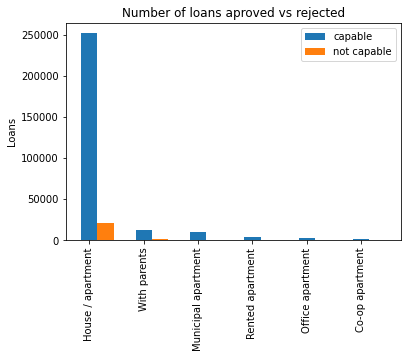

,NAME_HOUSING_TYPE,TARGET,target_0,total,presentase_defaulter_total
1,House / apartment,21272,251596,272868,7.795711
5,With parents,1736,13104,14840,11.698113
2,Municipal apartment,955,10228,11183,8.539748
4,Rented apartment,601,4280,4881,12.313051
3,Office apartment,172,2445,2617,6.572411
0,Co-op apartment,89,1033,1122,7.932264


In [ ]:
univariate_barplots(app_train, 'NAME_HOUSING_TYPE', 'TARGET', False)

Mayoritas customer memiliki tipe tempat tinggal rumah atau apartment. Customer dengan tipe tempat tinggal apartment sewa dan tinggal dengan orang tua cenderung memiliki kesulitan dalam melunasi dibanding customer dengan tipe tempat tinggal yang lain. Hal ini dilihat dari rasio antara customer yang kesulitan melunasi dengan total customer.   

#### Analisis Univariate Kolom NAME_INCOME_TYPE

In [ ]:
app_train['NAME_INCOME_TYPE'].value_counts()

Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

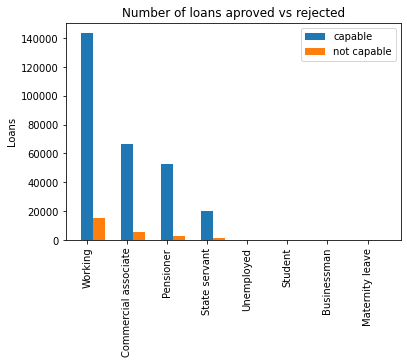

,NAME_INCOME_TYPE,TARGET,target_0,total,presentase_defaulter_total
7,Working,15224,143550,158774,9.588472
1,Commercial associate,5360,66257,71617,7.484257
3,Pensioner,2982,52380,55362,5.386366
4,State servant,1249,20454,21703,5.754965
6,Unemployed,8,14,22,36.363636
5,Student,0,18,18,0.000000
0,Businessman,0,10,10,0.000000
2,Maternity leave,2,3,5,40.000000


In [ ]:
income_type = univariate_barplots(app_train, 'NAME_INCOME_TYPE', 'TARGET', False)
income_type

In [ ]:
income_type.sort_values(by=['presentase_defaulter_total'], ascending = False)

,NAME_INCOME_TYPE,TARGET,target_0,total,presentase_defaulter_total
2,Maternity leave,2,3,5,40.000000
6,Unemployed,8,14,22,36.363636
7,Working,15224,143550,158774,9.588472
1,Commercial associate,5360,66257,71617,7.484257
4,State servant,1249,20454,21703,5.754965
3,Pensioner,2982,52380,55362,5.386366
5,Student,0,18,18,0.000000
0,Businessman,0,10,10,0.000000


Mayoritas tipe pemasukkan customer adalah pemasukkan dari bekerja. Berdasarkan tabel diatas customer yang tidak memiliki pemasukkan dan customer cuti hamil cenderung kesulitan melakukan pelunasan. Sedangkan customer dengan tipe pemasukkan dari bisnisnya atau seorang siswa cenderung dapat melakukan pelunasan.

#### Analisis Univariate Kolom Occupation_Type

In [ ]:
app_train['OCCUPATION_TYPE'].fillna('Data_Not_Available', inplace=True)

Kolom OCCUPATION_TYPE memiliki banyak null values

In [ ]:
app_train['OCCUPATION_TYPE'].value_counts()

Data_Not_Available       96391
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

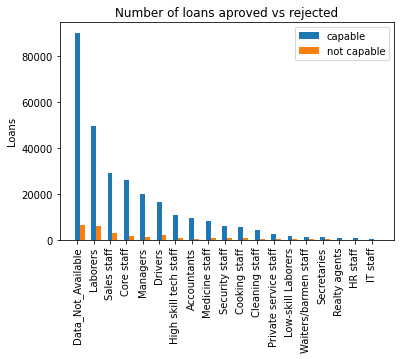

,OCCUPATION_TYPE,TARGET,target_0,total,presentase_defaulter_total
4,Data_Not_Available,6278,90113,96391,6.513056
9,Laborers,5838,49348,55186,10.578770
15,Sales staff,3092,29010,32102,9.631799
3,Core staff,1738,25832,27570,6.303954
11,Managers,1328,20043,21371,6.214028
5,Drivers,2107,16496,18603,11.326130
7,High skill tech staff,701,10679,11380,6.159930
0,Accountants,474,9339,9813,4.830327
12,Medicine staff,572,7965,8537,6.700246
17,Security staff,722,5999,6721,10.742449


In [ ]:
occupation = univariate_barplots(app_train, 'OCCUPATION_TYPE', 'TARGET', False)
occupation

In [ ]:
occupation.sort_values(by=['presentase_defaulter_total'], ascending = False)

,OCCUPATION_TYPE,TARGET,target_0,total,presentase_defaulter_total
10,Low-skill Laborers,359,1734,2093,17.152413
5,Drivers,2107,16496,18603,11.326130
18,Waiters/barmen staff,152,1196,1348,11.275964
17,Security staff,722,5999,6721,10.742449
9,Laborers,5838,49348,55186,10.578770
2,Cooking staff,621,5325,5946,10.443996
15,Sales staff,3092,29010,32102,9.631799
1,Cleaning staff,447,4206,4653,9.606705
14,Realty agents,59,692,751,7.856192
16,Secretaries,92,1213,1305,7.049808


Jenis pekerjaan yang dimiliki customer cukup beragam. Banyak customer tidak menyebutkan pekerjaannya. Bahkan jumlahnya merupakan yang tertinggi dibanding customer yang menyebutkan jenis pekerjaannya. Jenis pekerjaan yang paling banyak adalah laborers/pekerja. Customer dengan pekerjaan Low-skilled labors cenderung memiliki kesulitan dalam melakukan pelunasan. 

#### Analisis Univariate Kolom AMT_CREDIT

In [ ]:
approved_loan_credit = app_train[app_train['TARGET']==0]['AMT_CREDIT'].values
rejected_loan_credit = app_train[app_train['TARGET']==1]['AMT_CREDIT'].values

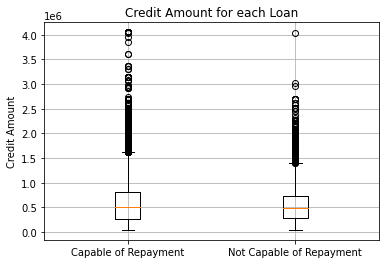

In [ ]:
plt.boxplot([approved_loan_credit, rejected_loan_credit])
plt.title('Credit Amount for each Loan')
plt.xticks([1,2],('Capable of Repayment','Not Capable of Repayment'))
plt.ylabel('Credit Amount')
plt.grid()
plt.show()

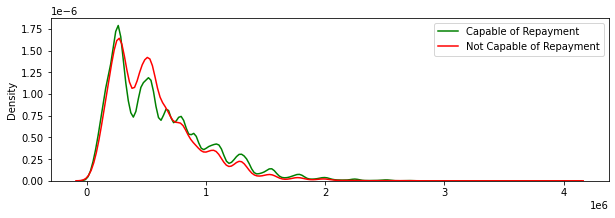

In [ ]:
plt.figure(figsize=(10,3))
sns.distplot(approved_loan_credit,hist=False,label="Capable of Repayment", color='green')
sns.distplot(rejected_loan_credit,hist=False,label="Not Capable of Repayment", color='red')
plt.legend()
plt.show()

Mayoritas customer jumlah pinjaman kurang dari 1 juta. Customer dengan kemampuan melunasi dan yang kesulitan memiliki distribusi data jumlah pinjaman yang hampir sama.

#### Analisis Univariate Kolom AMT_ANNUITY 

In [ ]:
app_train['AMT_ANNUITY'].isnull().sum()

12

In [ ]:
capable_loan_annuity = app_train[app_train['TARGET']==0]['AMT_ANNUITY'].values
not_capable_loan_annuity = app_train[app_train['TARGET']==1]['AMT_ANNUITY'].values

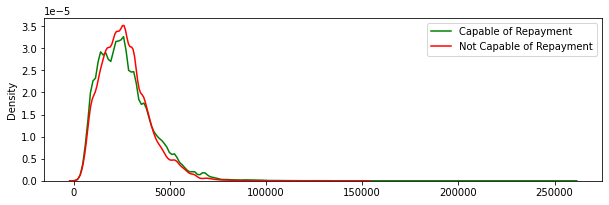

In [ ]:
plt.figure(figsize=(10,3))
sns.distplot(capable_loan_annuity,hist=False,label="Capable of Repayment", color='green')
sns.distplot(not_capable_loan_annuity,hist=False,label="Not Capable of Repayment", color='red')
plt.legend()
plt.show()

Mayoritas customer jumlah annuity kurang dari 50000. Customer dengan kesulitan melunasi pinjaman cenderung memiliki annuity lebih besar. 

#### Analisis Univariate Kolom AMT_GOODS_PRICE 

In [ ]:
app_train['AMT_GOODS_PRICE'].isnull().sum()

278

In [ ]:
capable_loan_goods_price = app_train[app_train['TARGET']==0]['AMT_GOODS_PRICE'].values
not_capable_loan_goods_price = app_train[app_train['TARGET']==1]['AMT_GOODS_PRICE'].values

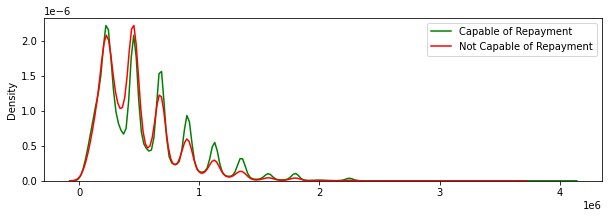

In [ ]:
plt.figure(figsize=(10,3))
sns.distplot(capable_loan_goods_price,hist=False,label="Capable of Repayment", color='green')
sns.distplot(not_capable_loan_goods_price,hist=False,label="Not Capable of Repayment", color='red')
plt.legend()
plt.show()

Sebagian besar harga barang yang diajukan kredit kurang dari 1 juta. 

#### Analisis Univariate Kolom AMT_INCOME_TOTAL 

In [ ]:
income_data = app_train.groupby('SK_ID_CURR').agg({'AMT_INCOME_TOTAL':'mean'}).reset_index()
income_data.head()

,SK_ID_CURR,AMT_INCOME_TOTAL
0,100002,202500.0
1,100003,270000.0
2,100004,67500.0
3,100006,135000.0
4,100007,121500.0


In [ ]:
income_data_final = pd.merge(app_train, income_data, on='SK_ID_CURR', how='left')
approved_income = income_data_final[income_data_final['TARGET']==0]['AMT_INCOME_TOTAL_x'].values
rejected_income = income_data_final[income_data_final['TARGET']==1]['AMT_INCOME_TOTAL_x'].values

In [ ]:
income_data_final.loc[income_data_final['SK_ID_CURR'] == 114967].index

Int64Index([12840], dtype='int64')

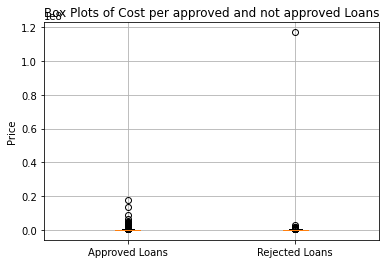

In [ ]:
plt.boxplot([approved_income, rejected_income])
plt.title('Box Plots of Cost per approved and not approved Loans')
plt.xticks([1,2],('Approved Loans','Rejected Loans'))
plt.ylabel('Price')
plt.grid()
plt.show()

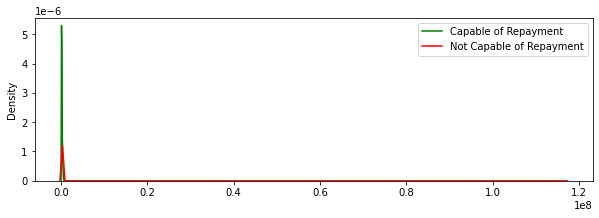

In [ ]:
plt.figure(figsize=(10,3))
sns.distplot(approved_income,hist=False,label="Capable of Repayment", color='green')
sns.distplot(rejected_income,hist=False,label="Not Capable of Repayment", color='red')
plt.legend()
plt.show()

Terdapat outlier yang jaraknya sangat jauh dengan whisker atas sehingga visualisasi data dengan grafik tidak menunjukan insight yang berarti

In [ ]:
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["Percentile", "Approved Loans", "Not Approved Loans"]

for i in range(0,101,5):
    x.add_row([i,np.round(np.percentile(approved_income,i), 3),\
               np.round(np.percentile(rejected_income,i), 3)])
print(x)

+------------+----------------+--------------------+
| Percentile | Approved Loans | Not Approved Loans |
+------------+----------------+--------------------+
|     0      |    25650.0     |      25650.0       |
|     5      |    67500.0     |      67500.0       |
|     10     |    81000.0     |      81000.0       |
|     15     |    90000.0     |      90000.0       |
|     20     |    99000.0     |      99000.0       |
|     25     |    112500.0    |      112500.0      |
|     30     |    112500.0    |      112500.0      |
|     35     |    126000.0    |      120873.6      |
|     40     |    135000.0    |      135000.0      |
|     45     |    135000.0    |      135000.0      |
|     50     |    148500.0    |      135000.0      |
|     55     |    157500.0    |      157500.0      |
|     60     |    166500.0    |      157500.0      |
|     65     |    180000.0    |      175500.0      |
|     70     |    185400.0    |      180000.0      |
|     75     |    202500.0    |      202500.0 

Pada tabel diatas terlihat percentile 0 hingga 45 baik pada target kelas 0 maupun 1 memiliki nilai yang sama. Percentile 50 hingga 95 memiliki nilai dengan selisih yang tidak terlalu besar. Akan tetapi nilai maksimal justru sangat besar sehingga nilai ini adalah outliers.

#### Analisis Univariate Kolom Days_Employed  


In [ ]:
app_train['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

In [ ]:
capable_days_employed = app_train[app_train['TARGET']==0]['DAYS_EMPLOYED'].values/365
not_capable_days_employed = app_train[app_train['TARGET']==1]['DAYS_EMPLOYED'].values/365

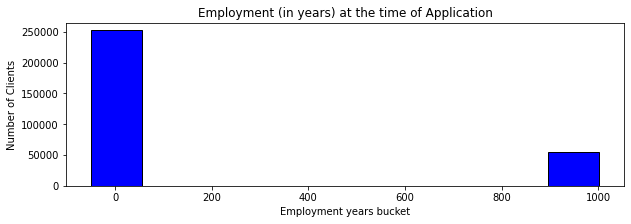

In [ ]:
plt.figure(figsize=(10,3))
plt.hist(app_train['DAYS_EMPLOYED'].values/365, bins=10, edgecolor='black', color='blue')
plt.title('Employment (in years) at the time of Application')
plt.xlabel('Employment years bucket')
plt.ylabel('Number of Clients')
plt.show()

Dari grafik diatas terlihat bahwa terdapat anomali dimana ada customer dengan masa kerja 1000 tahun. Data tersebut adalah outliers yang harus diatasi. 

#### Analisis Univariate Kolom DAYS_BIRTH 

In [ ]:
app_train['AGE_YEARS'] = app_train['DAYS_BIRTH'] * -1 / 365

In [ ]:
app_train['AGE_YEARS'].describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: AGE_YEARS, dtype: float64

Dilihat dari nilai mininmal dan maksimal rentang umur normal tidak ada outliers

In [ ]:
capable_age_years = app_train[app_train['TARGET']==0]['AGE_YEARS'].values
not_capable_age_years = app_train[app_train['TARGET']==1]['AGE_YEARS'].values

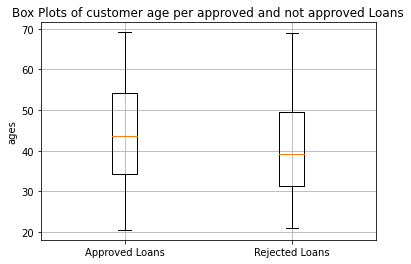

In [ ]:
plt.boxplot([capable_age_years, not_capable_age_years])
plt.title('Box Plots of customer age per approved and not approved Loans')
plt.xticks([1,2],('Approved Loans','Rejected Loans'))
plt.ylabel('ages')
plt.grid()
plt.show()

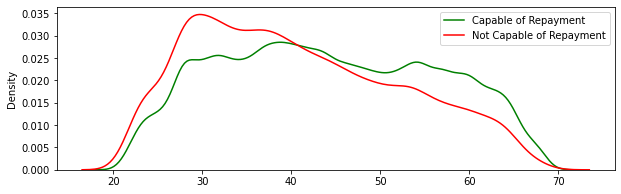

In [ ]:
plt.figure(figsize=(10,3))
sns.distplot(capable_age_years,hist=False,label="Capable of Repayment", color='green')
sns.distplot(not_capable_age_years,hist=False,label="Not Capable of Repayment", color='red')
plt.legend()
plt.show()

Customer memiliki rentang umur diantara 20 hingga 70 tahun. Customer yang memiliki kemampuan melunasi pinjaman rata-rata umurnya lebih dari 40 tahun. Sedangkan customer yang kesulitan dalam melunasi pinjaman cenderung berumur kurang dari 40 tahun.  

#### Analisis Univariate Kolom EXT_SOURCE1

Pada kolom EXT_SOURCE terdapat null values. Null values terbanyak adalah kolom EXT_SOURCE1 dengan presentase 56% dari seluruh data. Dari plot KDE dibawah, masing-masing EXT_SOURCE memiliki pengaruh yang signifikan terhadap target kelas atau kemampuan pelunasan pinjaman. 

##### Analisis Univariate Kolom EXT_SOURCE1

In [ ]:
app_train['EXT_SOURCE_1'].isnull().sum()
presentase_null = (app_train['EXT_SOURCE_1'].isnull().sum()/len(app_train['EXT_SOURCE_1']))*100
presentase_null

56.381072546998325

In [ ]:
capable_ext_source_1 = app_train[app_train['TARGET']==0]['EXT_SOURCE_1'].values
not_capable_ext_source_1 = app_train[app_train['TARGET']==1]['EXT_SOURCE_1'].values

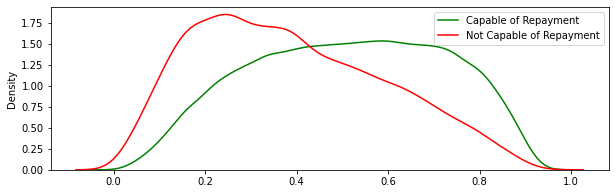

In [ ]:
plt.figure(figsize=(10,3))
sns.distplot(capable_ext_source_1,hist=False,label="Capable of Repayment", color='green')
sns.distplot(not_capable_ext_source_1,hist=False,label="Not Capable of Repayment", color='red')
plt.legend()
plt.show()

##### Analisis Univariate Kolom EXT_SOURCE2

In [ ]:
app_train['EXT_SOURCE_2'].isnull().sum()
presentase_null2 = (app_train['EXT_SOURCE_2'].isnull().sum()/len(app_train['EXT_SOURCE_2']))*100
presentase_null2

0.21462646864665005

In [ ]:
capable_ext_source_2 = app_train[app_train['TARGET']==0]['EXT_SOURCE_2'].values
not_capable_ext_source_2 = app_train[app_train['TARGET']==1]['EXT_SOURCE_2'].values

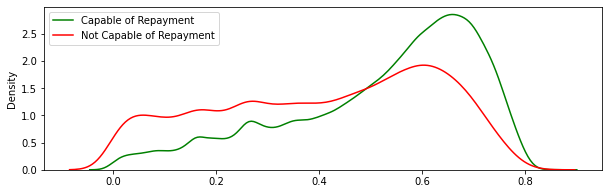

In [ ]:
plt.figure(figsize=(10,3))
sns.distplot(capable_ext_source_2,hist=False,label="Capable of Repayment", color='green')
sns.distplot(not_capable_ext_source_2,hist=False,label="Not Capable of Repayment", color='red')
plt.legend()
plt.show()

##### Analisis Univariate Kolom EXT_SOURCE3

In [ ]:
app_train['EXT_SOURCE_3'].isnull().sum()
presentase_null3 = (app_train['EXT_SOURCE_3'].isnull().sum()/len(app_train['EXT_SOURCE_3']))*100
presentase_null3

19.825307062186393

In [ ]:
capable_ext_source_3 = app_train[app_train['TARGET']==0]['EXT_SOURCE_3'].values
not_capable_ext_source_3 = app_train[app_train['TARGET']==1]['EXT_SOURCE_3'].values

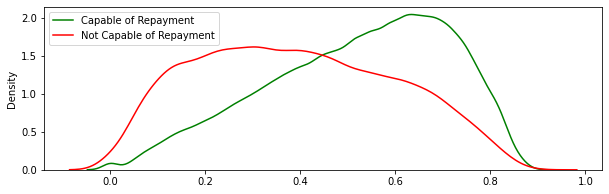

In [ ]:
plt.figure(figsize=(10,3))
sns.distplot(capable_ext_source_3,hist=False,label="Capable of Repayment", color='green')
sns.distplot(not_capable_ext_source_3,hist=False,label="Not Capable of Repayment", color='red')
plt.legend()
plt.show()

#### Analisis Univariate Kolom FLAG_DOCUMENT

In [ ]:
flag_document_df = app_train.loc[:, app_train.columns.str.contains('DOCUMENT')]
flag_document_df.head(5)

,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
for column in flag_document_df:
    
    count_0 = flag_document_df[column].value_counts()[0]
    count_1 = flag_document_df[column].value_counts()[1]
    total_rows = flag_document_df.shape[0]
    
    percent_0 = np.round((count_0*100/total_rows),2)
    percent_1 = np.round(100 - percent_0,2)
    
    print(column, "presentase dengan skor 1 = ",percent_1,"dan presentase dengan skor 1 =", percent_0)

FLAG_DOCUMENT_2 presentase dengan skor 1 =  0.0 dan presentase dengan skor 1 = 100.0
FLAG_DOCUMENT_3 presentase dengan skor 1 =  71.0 dan presentase dengan skor 1 = 29.0
FLAG_DOCUMENT_4 presentase dengan skor 1 =  0.01 dan presentase dengan skor 1 = 99.99
FLAG_DOCUMENT_5 presentase dengan skor 1 =  1.51 dan presentase dengan skor 1 = 98.49
FLAG_DOCUMENT_6 presentase dengan skor 1 =  8.81 dan presentase dengan skor 1 = 91.19
FLAG_DOCUMENT_7 presentase dengan skor 1 =  0.02 dan presentase dengan skor 1 = 99.98
FLAG_DOCUMENT_8 presentase dengan skor 1 =  8.14 dan presentase dengan skor 1 = 91.86
FLAG_DOCUMENT_9 presentase dengan skor 1 =  0.39 dan presentase dengan skor 1 = 99.61
FLAG_DOCUMENT_10 presentase dengan skor 1 =  0.0 dan presentase dengan skor 1 = 100.0
FLAG_DOCUMENT_11 presentase dengan skor 1 =  0.39 dan presentase dengan skor 1 = 99.61
FLAG_DOCUMENT_12 presentase dengan skor 1 =  0.0 dan presentase dengan skor 1 = 100.0
FLAG_DOCUMENT_13 presentase dengan skor 1 =  0.35 dan p

Keberadaan dokumen pada data dengan skor 1 sangatlah sedikit kecuali pada dokumen 3. FLAG_DOCUMENT_3 memiliki jumlah yang cenderung seimbang pada kedua kelas dibanding FLAG_DOCUMENT lainnya.

### Feature Engineering 

In [6]:
bureau = pd.read_csv('/content/drive/MyDrive/VIX Rakamin/Home Credit/Tugas Akhir//bureau.csv')
bureau_balance = pd.read_csv('/content/drive/MyDrive/VIX Rakamin/Home Credit/Tugas Akhir/bureau_balance.csv')
pos_cash_balance = pd.read_csv('/content/drive/MyDrive/VIX Rakamin/Home Credit/Tugas Akhir/POS_CASH_balance.csv')

previous_app = pd.read_csv('/content/drive/MyDrive/VIX Rakamin/Home Credit/Tugas Akhir/previous_application.csv')
installments_payments = pd.read_csv('/content/drive/MyDrive/VIX Rakamin/Home Credit/Tugas Akhir/installments_payments.csv')
credit_card_balance = pd.read_csv('/content/drive/MyDrive/VIX Rakamin/Home Credit/Tugas Akhir/credit_card_balance.csv')

#### Membuat Fitur Baru dari Tabel Bureau

In [ ]:
bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [7]:
# Groupby berdasarkan SK_ID_CURR, hitung jumlah dari pinjaman sebelumnyan dan merename kolom
previous_loan_counts = bureau.groupby('SK_ID_CURR', as_index=False)['SK_ID_BUREAU'].count().rename(columns = {'SK_ID_BUREAU': 'previous_loan_counts'})
previous_loan_counts.head()

#### Fungsi untuk menghitung dan menormalisasi nilai dari variabel categorial

In [8]:
def normalize_categorical(df, group_var, col_name):
    # select the categorical columns
    categorical = pd.get_dummies(df.select_dtypes('object'))
    
    # Make sure to put the identifying id on the column
    categorical[group_var] = df[group_var]
    
    # Groupby the group var and calculate the sum and mean
    categorical = categorical.groupby(group_var).agg(['sum', 'mean'])                                              
    
    column_names = []
    
    # Iterate through the columns in level 0
    for var in categorical.columns.levels[0]:
        # Iterate through the stats in level 1
        for stat in ['count', 'count_norm']:
            # Make a new column name
            column_names.append('%s_%s_%s' % (col_name, var, stat))
    
    categorical.columns = column_names
    
    return categorical

In [9]:
bureau_counts = normalize_categorical(bureau, group_var = 'SK_ID_CURR', col_name = 'bureau')
bureau_counts.head()

#### Mengelompokan Data Berdasarjan SK_ID_CURR

In [10]:
data_bureau_agg=bureau.groupby(by='SK_ID_CURR').mean()
data_credit_card_balance_agg=credit_card_balance.groupby(by='SK_ID_CURR').mean()
data_previous_application_agg=previous_app.groupby(by='SK_ID_CURR').mean()
data_installments_payments_agg=installments_payments.groupby(by='SK_ID_CURR').mean()
data_POS_CASH_balance_agg=pos_cash_balance.groupby(by='SK_ID_CURR').mean()

data_bureau_agg.head()

#### Merge Data 

In [11]:
def merge(df):
    df = df.join(data_bureau_agg, how='left', on='SK_ID_CURR', lsuffix='1', rsuffix='2') 
    df = df.join(bureau_counts, on = 'SK_ID_CURR', how = 'left')
    df = df.merge(previous_loan_counts, on = 'SK_ID_CURR', how = 'left')
    df = df.join(data_credit_card_balance_agg, how='left', on='SK_ID_CURR', lsuffix='1', rsuffix='2')    
    df = df.join(data_previous_application_agg, how='left', on='SK_ID_CURR', lsuffix='1', rsuffix='2')   
    df = df.join(data_installments_payments_agg, how='left', on='SK_ID_CURR', lsuffix='1', rsuffix='2') 
    
    return df

train = merge(app_train)
test = merge(app_test)
display(train.head())

In [12]:
print(train.shape)
print(test.shape)

(307511, 230)
(48744, 229)


In [13]:
#combining the data
ntrain = train.shape[0]
ntest = test.shape[0]

y_train = train.TARGET.values

all_data = pd.concat([train, test]).reset_index(drop=True)
all_data.drop(['TARGET'], axis=1, inplace=True)

#### Lanjutan

In [14]:
def correct_birth(df):
    
    df['DAYS_BIRTH'] = round((df['DAYS_BIRTH'] * (-1))/365)
    return df

def convert_abs(df):
    df['DAYS_EMPLOYED'] = abs(df['DAYS_EMPLOYED'])
    df['DAYS_REGISTRATION'] = abs(df['DAYS_REGISTRATION'])
    df['DAYS_ID_PUBLISH'] = abs(df['DAYS_ID_PUBLISH'])
    df['DAYS_LAST_PHONE_CHANGE'] = abs(df['DAYS_LAST_PHONE_CHANGE'])
    return df

def missing(df):
    
    features = ['previous_loan_counts','NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAPARTMENTS_AVG','NONLIVINGAREA_MEDI','OWN_CAR_AGE']
    
    for f in features:
        df[f] = df[f].fillna(0 )
    return df

def transform_app(df):
    df = correct_birth(df)
    df = convert_abs(df)
    df = missing(df)
    return df

   

all_data = transform_app(all_data)


In [15]:
all_data['NO_OF_CLIENT_PHONES'] = all_data['FLAG_MOBIL'] + all_data['FLAG_EMP_PHONE'] + all_data['FLAG_WORK_PHONE']
all_data.head()

In [16]:
all_data['FLAG_CLIENT_OUTSIDE_CITY'] = np.where((all_data['REG_CITY_NOT_WORK_CITY']==1) & (all_data['REG_CITY_NOT_LIVE_CITY']==1),1,0)
all_data.head()

In [17]:
all_data['FLAG_CLIENT_OUTSIDE_REGION'] = np.where((all_data['REG_REGION_NOT_LIVE_REGION']==1) & (all_data['REG_REGION_NOT_WORK_REGION']==1),1,0)
all_data.head()

#### Menghapus Fitur Tidak Terpakai

In [18]:
def delete(df):
     return df.drop(['FLAG_MOBIL', 'FLAG_EMP_PHONE' ,'FLAG_WORK_PHONE','REG_CITY_NOT_WORK_CITY','REG_CITY_NOT_LIVE_CITY','REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION'], axis=1)
def transform(df):
    df = delete(df)
   
    return df

all_data = transform(all_data)
all_data.head()

In [19]:
def delete_id(df):
    return df.drop(['SK_ID_CURR', 'SK_ID_PREV','SK_ID_BUREAU'], axis = 1)

all_data = delete_id(all_data)

In [ ]:
all_data.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT1,AMT_ANNUITY1,AMT_GOODS_PRICE1,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START1,LIVE_REGION_NOT_WORK_REGION,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE_YEARS,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_UPDATE,AMT_ANNUITY2,bureau_CREDIT_ACTIVE_Active_count,bureau_CREDIT_ACTIVE_Active_count_norm,bureau_CREDIT_ACTIVE_Bad debt_count,bureau_CREDIT_ACTIVE_Bad debt_count_norm,bureau_CREDIT_ACTIVE_Closed_count,bureau_CREDIT_ACTIVE_Closed_count_norm,bureau_CREDIT_ACTIVE_Sold_count,bureau_CREDIT_ACTIVE_Sold_count_norm,bureau_CREDIT_CURRENCY_currency 1_count,bureau_CREDIT_CURRENCY_currency 1_count_norm,bureau_CREDIT_CURRENCY_currency 2_count,bureau_CREDIT_CURRENCY_currency 2_count_norm,bureau_CREDIT_CURRENCY_currency 3_count,bureau_CREDIT_CURRENCY_currency 3_count_norm,bureau_CREDIT_CURRENCY_currency 4_count,bureau_CREDIT_CURRENCY_currency 4_count_norm,bureau_CREDIT_TYPE_Another type of loan_count,bureau_CREDIT_TYPE_Another type of loan_count_norm,bureau_CREDIT_TYPE_Car loan_count,bureau_CREDIT_TYPE_Car loan_count_norm,bureau_CREDIT_TYPE_Cash loan (non-earmarked)_count,bureau_CREDIT_TYPE_Cash loan (non-earmarked)_count_norm,bureau_CREDIT_TYPE_Consumer credit_count,bureau_CREDIT_TYPE_Consumer credit_count_norm,bureau_CREDIT_TYPE_Credit card_count,bureau_CREDIT_TYPE_Credit card_count_norm,bureau_CREDIT_TYPE_Interbank credit_count,bureau_CREDIT_TYPE_Interbank credit_count_norm,bureau_CREDIT_TYPE_Loan for business development_count,bureau_CREDIT_TYPE_Loan for business development_count_norm,bureau_CREDIT_TYPE_Loan for purchase of shares (margin lending)_count,bureau_CREDIT_TYPE_Loan for purchase of shares (margin lending)_count_norm,bureau_CREDIT_TYPE_Loan for the purchase of equipment_count,bureau_CREDIT_TYPE_Loan for the purchase of equipment_count_norm,bureau_CREDIT_TYPE_Loan for working capital replenishment_count,bureau_CREDIT_TYPE_Loan for working capital replenishment_count_norm,bureau_CREDIT_TYPE_Microloan_count,burea

In [20]:
print(all_data.columns)

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT1', 'AMT_ANNUITY1',
       'AMT_GOODS_PRICE1', 'NAME_TYPE_SUITE',
       ...
       'NFLAG_INSURED_ON_APPROVAL', 'NUM_INSTALMENT_VERSION',
       'NUM_INSTALMENT_NUMBER', 'DAYS_INSTALMENT', 'DAYS_ENTRY_PAYMENT',
       'AMT_INSTALMENT', 'AMT_PAYMENT', 'NO_OF_CLIENT_PHONES',
       'FLAG_CLIENT_OUTSIDE_CITY', 'FLAG_CLIENT_OUTSIDE_REGION'],
      dtype='object', length=222)


#### Mengatasi Missing Values

In [21]:
def miss_numerical(df):
    
    features = ['previous_loan_counts','NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAPARTMENTS_AVG','NONLIVINGAREA_MEDI','OWN_CAR_AGE']
    numerical_features = all_data.select_dtypes(exclude = ["object"] ).columns
    for f in numerical_features:
        if f not in features:
            df[f] = df[f].fillna(df[f].median())
      
    return df

def miss_categorical(df):
    
    categorical_features = all_data.select_dtypes(include = ["object"]).columns
    
    for f in categorical_features:
        df[f] = df[f].fillna(df[f].mode()[0])
        
    return df

def transform_feature(df):
    df = miss_numerical(df)
    df = miss_categorical(df)
    return df

all_data = transform_feature(all_data)


all_data.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT1,AMT_ANNUITY1,AMT_GOODS_PRICE1,NAME_TYPE_SUITE,...,NFLAG_INSURED_ON_APPROVAL,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT,NO_OF_CLIENT_PHONES,FLAG_CLIENT_OUTSIDE_CITY,FLAG_CLIENT_OUTSIDE_REGION
0,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,...,0.000000,1.052632,10.000000,-295.000000,-315.421053,11559.247105,11559.247105,2,0,0
1,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,...,0.666667,1.040000,5.080000,-1378.160000,-1385.320000,64754.586000,64754.586000,2,0,0
2,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,...,0.000000,1.333333,2.000000,-754.000000,-761.666667,7096.155000,7096.155000,3,0,0
3,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,...,0.000000,1.125000,4.437500,-252.250000,-271.625000,62947.088438,62947.088438,2,0,0
4,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,...,0.600000,1.166667,7.045455,-1028.606061,-1032.242424,12666.444545,12214.060227,2,0,0


#### Scalling Data Numeric

In [22]:
from sklearn.preprocessing import MinMaxScaler

def encoder(df):
    scaler = MinMaxScaler()
    numerical = all_data.select_dtypes(exclude = ["object"]).columns
    features_transform = pd.DataFrame(data= df)
    features_transform[numerical] = scaler.fit_transform(df[numerical])
    display(features_transform.head(n = 5))
    return df

all_data = encoder(all_data)

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT1,AMT_ANNUITY1,AMT_GOODS_PRICE1,NAME_TYPE_SUITE,...,NFLAG_INSURED_ON_APPROVAL,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT,NO_OF_CLIENT_PHONES,FLAG_CLIENT_OUTSIDE_CITY,FLAG_CLIENT_OUTSIDE_REGION
0,Cash loans,M,N,Y,0.0,0.001512,0.090287,0.090032,0.077441,Unaccompanied,...,0.000000,0.026991,0.062846,0.899966,0.898168,0.004615,0.004615,0.666667,0.0,0.0
1,Cash loans,F,N,N,0.0,0.002089,0.311736,0.132924,0.271605,Family,...,0.666667,0.026667,0.028490,0.528893,0.549439,0.025854,0.025854,0.666667,0.0,0.0
2,Revolving loans,M,Y,Y,0.0,0.000358,0.022472,0.020025,0.023569,Unaccompanied,...,0.000000,0.034188,0.006983,0.742720,0.752716,0.002833,0.002833,1.000000,0.0,0.0
3,Cash loans,F,N,Y,0.0,0.000935,0.066837,0.109477,0.063973,Unaccompanied,...,0.000000,0.028846,0.024004,0.914611,0.912443,0.025133,0.025133,0.666667,0.0,0.0
4,Cash loans,M,N,Y,0.0,0.000819,0.116854,0.078975,0.117845,Unaccompanied,...,0.600000,0.029915,0.042214,0.648645,0.664523,0.005057,0.004877,0.666667,0.0,0.0


#### Konversi Fitur Categorical

In [23]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le_count = 0


for col in all_data:
    if all_data[col].dtype == 'object':
        if len(list(all_data[col].unique())) <= 2:
            le.fit(all_data[col])
            all_data[col] = le.transform(all_data[col])
            le_count += 1
           
print('%d columns were label encoded.' % le_count)

4 columns were label encoded.


In [24]:
all_data = pd.get_dummies(all_data)

display(all_data.shape)

(356255, 342)

In [25]:
import pickle 
y = pd.DataFrame(y_train)
y.to_pickle('/content/drive/MyDrive/VIX Rakamin/Home Credit/Tugas Akhir/pickle/y_train.pkl')
all_data.to_pickle('/content/drive/MyDrive/VIX Rakamin/Home Credit/Tugas Akhir/pickle/all_data.pkl')

### Modelling

In [3]:
all_data = pd.read_pickle('/content/drive/MyDrive/VIX Rakamin/Home Credit/Tugas Akhir/pickle/all_data.pkl')
all_data.head()

,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT1,AMT_ANNUITY1,AMT_GOODS_PRICE1,REGION_POPULATION_RELATIVE,DAYS_BIRTH,...,HOUSETYPE_MODE_block of flats,HOUSETYPE_MODE_specific housing,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden
0,0,0,1,0.0,0.001512,0.090287,0.090032,0.077441,0.256702,0.122449,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0.0,0.002089,0.311736,0.132924,0.271605,0.045506,0.530612,...,1,0,0,1,0,0,0,0,0,0
2,1,1,1,0.0,0.000358,0.022472,0.020025,0.023569,0.135340,0.653061,...,1,0,0,0,0,0,0,1,0,0
3,0,0,1,0.0,0.000935,0.066837,0.109477,0.063973,0.107480,0.653061,...,1,0,0,0,0,0,0,1,0,0
4,0,0,1,0.0,0.000819,0.116854,0.078975,0.117845,0.393191,0.714286,...,1,0,0,0,0,0,0,1,0,0


In [4]:
y = pd.read_pickle('/content/drive/MyDrive/VIX Rakamin/Home Credit/Tugas Akhir/pickle/y_train.pkl')
y.head()

,0
0,1
1,0
2,0
3,0
4,0


In [5]:
y_train = y.values

In [6]:
ntrain = 307511
train = all_data[:ntrain]
test = all_data[ntrain:]

print("Training shape", train.shape)
print("Testing shape", test.shape)

Training shape (307511, 342)
Testing shape (48744, 342)


In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(train, y_train, test_size = 0.3, random_state = 200)
print("X Training shape", X_train.shape)
print("X Testing shape", X_test.shape)
print("Y Training shape", Y_train.shape)
print("Y Testing shape", Y_test.shape)


X Training shape (215257, 342)
X Testing shape (92254, 342)
Y Training shape (215257, 1)
Y Testing shape (92254, 1)


#### Logistic Regression

In [8]:
from sklearn.metrics import make_scorer
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.linear_model import LogisticRegression

In [38]:
logreg = LogisticRegression(random_state=0, class_weight='balanced', C=100, penalty='l2')
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict_proba(X_test)[:,1]

print('Train/Test split results:')
print("ROC",  roc_auc_score(Y_test, Y_pred))

Train/Test split results:
ROC 0.7582271025790561


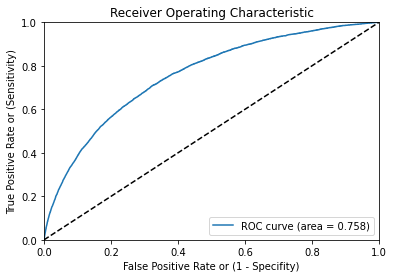

In [39]:
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

#### Hyperparameter

In [9]:
from sklearn.model_selection import GridSearchCV

In [10]:
#Tuning the hyper-parameters of an estimator
LogisticRegression().get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])

In [12]:
param_grid_log_reg = {'C': [0.01, 0.1, 1, 10, 100] ,'penalty':['l1','l2'], 'class_weight' : ['balanced']}
grid_log_reg=GridSearchCV(LogisticRegression(),param_grid_log_reg,verbose = 3)
grid_log_reg.fit(X_train,Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END C=0.01, class_weight=balanced, penalty=l1;, score=nan total time=   0.5s
[CV 2/5] END C=0.01, class_weight=balanced, penalty=l1;, score=nan total time=   0.5s
[CV 3/5] END C=0.01, class_weight=balanced, penalty=l1;, score=nan total time=   0.6s
[CV 4/5] END C=0.01, class_weight=balanced, penalty=l1;, score=nan total time=   0.6s
[CV 5/5] END C=0.01, class_weight=balanced, penalty=l1;, score=nan total time=   1.1s
[CV 1/5] END C=0.01, class_weight=balanced, penalty=l2;, score=0.692 total time=  15.5s
[CV 2/5] END C=0.01, class_weight=balanced, penalty=l2;, score=0.696 total time=  13.2s
[CV 3/5] END C=0.01, class_weight=balanced, penalty=l2;, score=0.695 total time=  13.1s
[CV 4/5] END C=0.01, class_weight=balanced, penalty=l2;, score=0.692 total time=  13.0s
[CV 5/5] END C=0.01, class_weight=balanced, penalty=l2;, score=0.691 total time=  12.9s
[CV 1/5] END C=0.1, class_weight=balanced, penalty=l1;, score=nan tot

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'class_weight': ['balanced'],
                         'penalty': ['l1', 'l2']},
             verbose=3)

In [13]:
print(grid_log_reg.best_params_) 
grid_predictions_log_reg = grid_log_reg.predict_proba(X_test)[:,1] 

{'C': 1, 'class_weight': 'balanced', 'penalty': 'l2'}


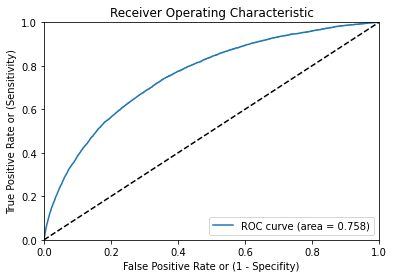

In [14]:
fpr, tpr, thresholds = roc_curve(Y_test, grid_predictions_log_reg)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

In [15]:
roc_auc

0.7582704202338075

#### Gradient Boosting Tree

In [40]:
from sklearn.ensemble import GradientBoostingClassifier
gbt = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
gbt.fit(X_train, Y_train)

GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=0)

In [41]:
y_test_prediction_proba_gbt = gbt.predict_proba(X_test)[:, 1]

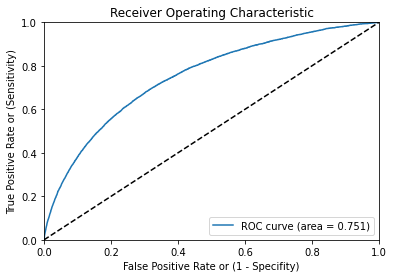

In [42]:
fpr, tpr, thresholds = roc_curve(Y_test, y_test_prediction_proba_gbt)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

In [43]:
roc_auc

0.7507580119904336